# Credit Card Fraud Prediction

## **Problem Statement**

* Credit cards offer convenience for purchases but carry the risk of fraud.
* Fraudulent transactions result in unauthorized charges for customers.
* This project aims to build a classification model to accurately detect fraudulent credit card transactions.

## **Dataset**

* The dataset contains European credit card transactions from September 2013.
* **Key Points:**
    * Two days of transactions
    * 492 frauds out of 284,807 transactions
    * Highly imbalanced dataset (0.172% frauds)

#### Importing all required python library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import json

import matplotlib.pyplot as plt
%matplotlib inline

#### Let's load creditcard.csv

In [2]:
df = pd.read_csv("creditcard.csv")

#### let's see how our dataframe look like

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Let's performe some descriptive statistics on main dataframe df

#### shape and data tyeps of each columns info

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Preprocessing

#### check for duplicated data points ( rows in df DataFrame )

In [6]:
df.duplicated().sum()

1081

In [7]:
# let's drop dublicated data-points
df.drop_duplicates(keep = 'first', inplace = True)

In [8]:
df.duplicated().sum()

0

#### fine now there is no duplicated data points

### Shuffle Data:

In [9]:
# Let's shuffle the whole dataframe and reset the index.
df = df.sample(frac=1, random_state=42).reset_index(drop = True)

### Check for missing values
#### Let's check that is any null values into my dataframe df or not

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### No! There is no missing values in my DataFrame df, so it's again fine

#### Let's show high level top stats from DataFrame df

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


### Check distribution of classes (Understanding Class Imbalance)

#### Because this is a Credit Card Fraud Detection System,
#### the data may be highly imbalanced.
#### So let's check.

#### This is a binary classification problem and my target clumn is 'Class', let's check imblance on feature 'Class'

In [12]:
print(f"No Frauds: {round(100*(df['Class'].value_counts()[0]/df.shape[0]), 2)} % of the dataset")
print(f"Frauds: {round(100*(df['Class'].value_counts()[1]/df.shape[0]), 2)} % of the dataset")

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


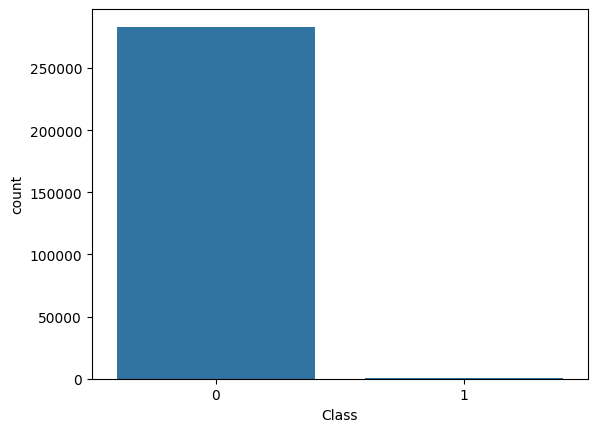

In [13]:
# Visualization
sns.countplot(x='Class', data=df)
plt.show()

In [14]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

**Balancing the data. Addressing Imbalance (Undersampling):**
- Here we can see easily say that data is highly imblance
- If we leave as it is then there will big challenges to train my model and also this is biases towards 0
- To stop do that simply we need to convert this imblance data into blance data
- Here minority class 1 has 473 data points that is enough for train ML model
- So here we do under sampling



In [15]:
df_fraud = df[df['Class'] == 1]
df_nonFraud = df[df['Class'] == 0].sample(473, random_state = 42)
df = pd.concat([df_fraud, df_nonFraud], axis=0).sample(frac = 1, random_state = 42).reset_index(drop = True)

In [16]:
df['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

#### Now here we can see train data is blanced right now. Fine

### Exploratory Data Analysis (EDA), Feature Engineering, and Selection

In [17]:
sns.set_style(style='darkgrid')

#### let's see which columns is highily coreelated with 'Class' target column

- You can see that a very high correlation means good features (columns) that we stored in the relevant_columns variable, and we skip all other features (columns) that have a correlation less than 0.2 and greater than -0.2.
- At the end of the process, we will have the most valuable features, and we will also reduce the number of features (sometimes having more features may affect model accuracy).

In [18]:
relevant_columns = df.corr()[(df.corr()['Class'] >= 0.2) | (df.corr()['Class'] <= -0.2)][['Class']].T.columns
df.corr()[(df.corr()['Class'] >= 0.2) | (df.corr()['Class'] <= -0.2)][['Class']].T  #df.corr()[['Class']]

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,Class
Class,-0.41548,0.480987,-0.562283,0.70504,-0.353406,-0.410617,-0.46762,-0.564377,-0.627,0.677543,-0.674892,-0.745788,-0.586446,-0.547633,-0.463647,0.269217,0.207444,1.0


In [19]:
# Let's modify dataframe the original columns to these selected columns chosen
df = df.loc[:, relevant_columns]

#### Now let's see heatmap of all features with out target 'Class' column

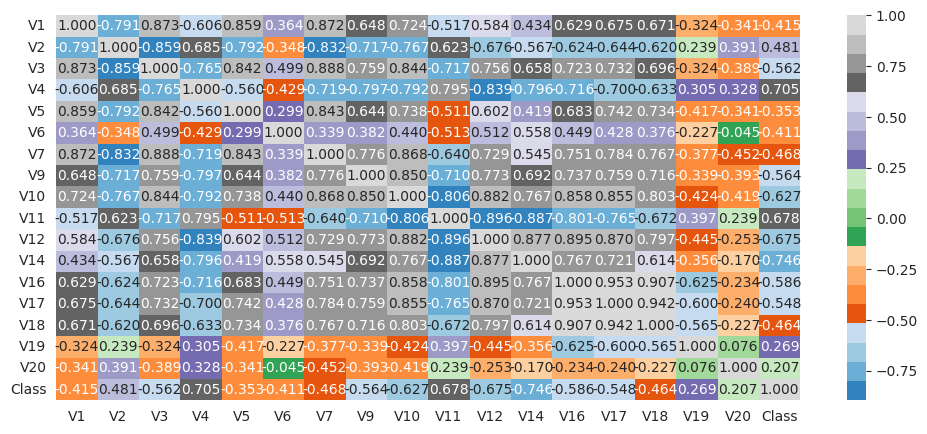

In [20]:
plt.figure(figsize = (12, 5))
sns.heatmap(df.corr(), annot = True, fmt = ".3f", cmap="tab20c");

### Outlier Treatment (IQR):

In [21]:
def apply_IQR(series_col):
    """
    This function takes a numeric series and returns a new series with outliers replaced by IQR bounds.

    Args:
    series_col: The numeric series to be cleaned.

    Returns:
    A new series with outliers replaced by IQR bounds.

    """

    Q1 = series_col.quantile(0.25)
    Q3 = series_col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # cleaned_series = series_col.clip(lower_bound, upper_bound)
    return lower_bound, upper_bound

IQR_dic = {}
for col in df.columns:
    lower_bound, upper_bound = apply_IQR(df[col])
    df[col] = df[col].clip(lower_bound, upper_bound)
    IQR_dic[col] = {"lower_bound": lower_bound, "upper_bound": upper_bound}

### Visualizations:

Green Indicate: Not Fraud, and Red indicate: Fraud


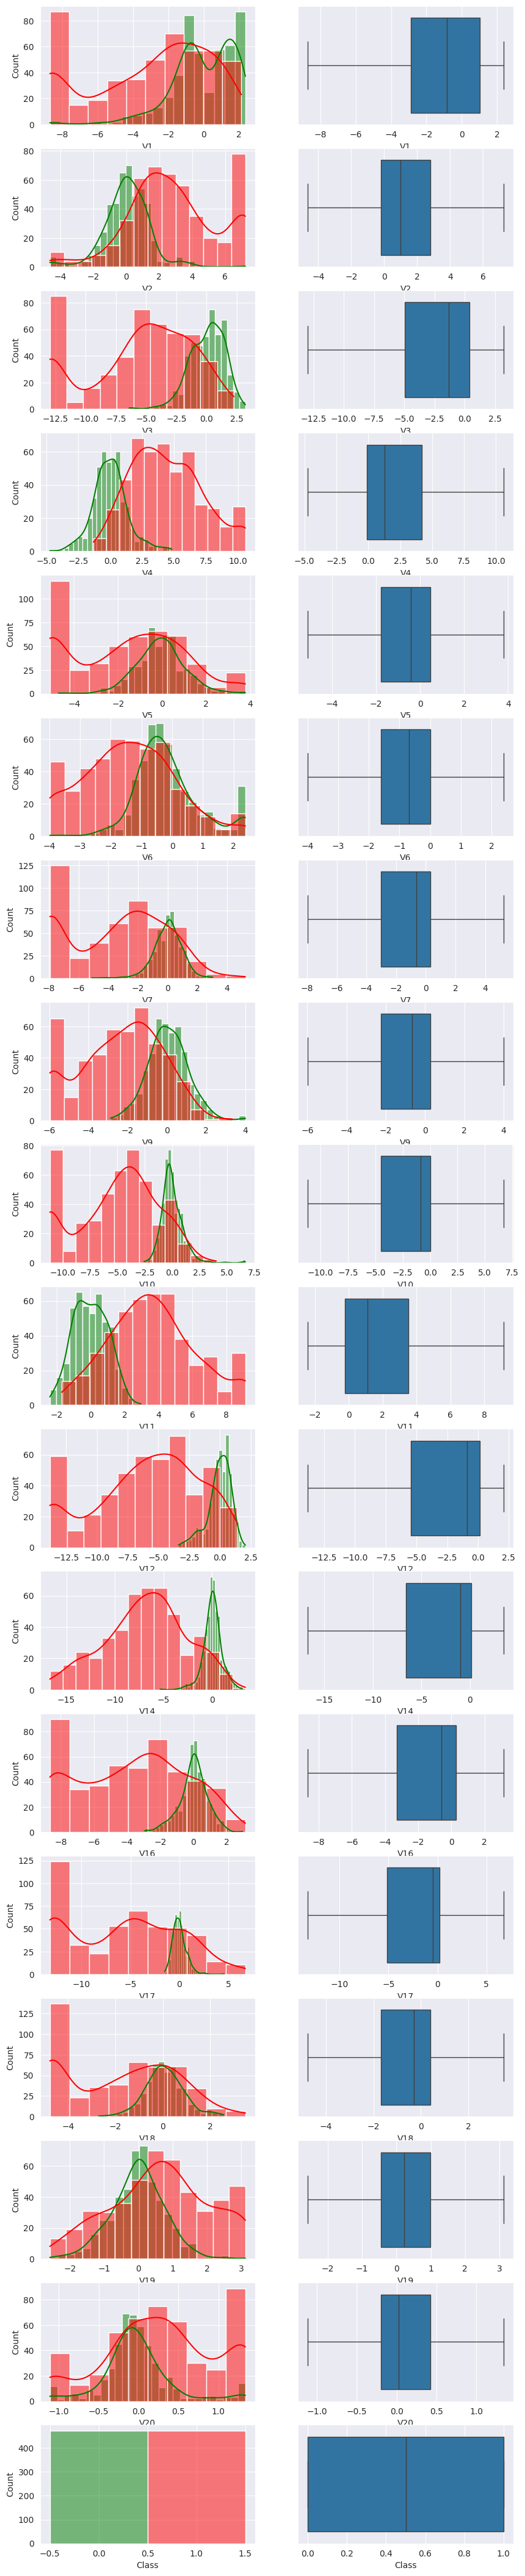

In [22]:
# plt.figure(figsize=(10, 7))
print("Green Indicate: Not Fraud, and Red indicate: Fraud")

fig, ax = plt.subplots(len(df.columns),2, figsize = (10,len(df.columns)*3))
for idx, cname in zip(range(0, len(df.columns)), list(df.columns)):

    sns.histplot(df[df["Class"] == 0][cname], color = 'g', kde=True, ax = ax[idx][0])
    sns.histplot(df[df["Class"] == 1][cname], color = 'r', kde=True, ax = ax[idx][0])

    sns.boxplot(x = df[cname], ax = ax[idx][1]);


### Train/Test Split - Apply a sampling distribution to find the best split.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis = 1), df['Class'], test_size = 0.2, stratify=df['Class'], random_state = 42)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((756, 17), (756,), (190, 17), (190,))

### Hyperparameter Tuning/Model Improvement

In [25]:
model_params = {

    'lr': {
        'model': LogisticRegression(),
        'params_grid': {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1.0, 10.0], # Test wide range for C
        }
    },

    'knn': {
        'model': KNeighborsClassifier(), # Classifier version
        'params_grid': {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            'weights': ['uniform', 'distance'],
        }
    },

    'svm': {
        'model': SVC(),
        'params_grid': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1, 5, 10, 20],
            'degree': [2, 3, 5]
        }
    },

    'rf': {
        'model': RandomForestClassifier(), # Use the classifier version
        'params_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 3, 5, 8],
            'max_samples' : [ 0.5, 0.75, 1]
        }
    },


    'gbc': {
        'model': GradientBoostingClassifier(), # Classifier version
        'params_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [2, 3, 5],
            'learning_rate': [0.01, 0.05, 0.1],
        }
    },

    'xgbc': {
        'model': XGBClassifier(),  # Classifier version
        'params_grid': {
            'gamma': [0, 0.1, 0.2, 0.5],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.05, 0.1, 0.2],
            'reg_lambda': [0.5, 1.0, 5.0],
        }
    },

}


In [ ]:
score = {
    "model": [],
    "best_score_": [],
    "best_params_": [],
}

for itm in model_params :
    print(model_params[itm]['model'])
    clf = GridSearchCV(model_params[itm]['model'], param_grid=model_params[itm]['params_grid'], cv = 5)
    clf.fit(df.drop('Class', axis = 1).values, df['Class'].values)

    score["model"].append(itm)
    score["best_score_"].append(clf.best_score_)
    score["best_params_"].append(clf.best_params_)

In [27]:
score_df = pd.DataFrame(score)
score_df

,model,best_score_,best_params_
0,lr,0.932314,"{'C': 10.0, 'penalty': 'l2'}"
1,knn,0.932325,"{'n_neighbors': 7, 'weights': 'distance'}"
2,svm,0.933383,"{'C': 5, 'degree': 2, 'kernel': 'linear'}"
3,rf,0.935494,"{'max_depth': None, 'max_samples': 0.75, 'n_es..."
4,gbc,0.934425,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
5,xgbc,0.934431,"{'gamma': 0, 'learning_rate': 0.05, 'max_depth..."


### Model Training

In [28]:
model_name, model_best_score_, model_best_params_ = score_df.sort_values(by = 'best_score_', ascending=False).iloc[0,:]

print(f"Best Model: {model_name} | Score: {model_best_score_} | Params: {model_best_params_}")

Best Model: rf | Score: 0.9354942912837648 | Params: {'max_depth': None, 'max_samples': 0.75, 'n_estimators': 50}


In [29]:
best_model = model_params[model_name]['model']
best_model.set_params(**model_best_params_)
print(f"We initialize the {best_model}\n\nmodel with appropriate parameters: {model_best_params_}")

We initialize the RandomForestClassifier(max_samples=0.75, n_estimators=50)

model with appropriate parameters: {'max_depth': None, 'max_samples': 0.75, 'n_estimators': 50}


In [30]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.75, n_estimators=50)

### Model Validation and the accuracy of the model:

In [31]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [32]:
print(f"Confusion matrix for train dataset:\n{confusion_matrix(y_train, y_pred_train)}\n\n")
print(f"Classification Report for train dataset:\n\n{classification_report(y_train, y_pred_train)}")

Confusion matrix for train dataset:
[[378   0]
 [  2 376]]


Classification Report for train dataset:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       378
           1       1.00      0.99      1.00       378

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



In [33]:
print(f"Confusion matrix for test dataset:\n{confusion_matrix(y_test, y_pred_test)}\n\n")
print(f"Classification Report for test dataset:\n\n{classification_report(y_test, y_pred_test)}")

Confusion matrix for test dataset:
[[94  1]
 [14 81]]


Classification Report for test dataset:

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        95
           1       0.99      0.85      0.92        95

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



### Best Model all accuracy metrics

In [34]:
pd.DataFrame({
    "Accuracy": [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
    "Precision": [precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)],
    "Recall": [recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)],
    "F1 Score": [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)],
    "Roc Auc Score": [roc_auc_score(y_train, y_pred_train), roc_auc_score(y_test, y_pred_test)],
}, index=["Train", "Test"])

,Accuracy,Precision,Recall,F1 Score,Roc Auc Score
Train,0.997354,1.000000,0.994709,0.997347,0.997354
Test,0.921053,0.987805,0.852632,0.915254,0.921053


### Let's save all necessary files for model deployment

In [35]:
# Save thresholds as JSON
with open('iqr_thresholds.json', 'w') as f:
    json.dump(IQR_dic, f)

In [36]:
with open("clf.pkl", 'wb') as outfile :
    pickle.dump(best_model, outfile)